### TensorFlow Basics: "Building, Training and Visualizing a Simple Neural Network"### 

**By [Patrick Hebron](http://www.patrickhebron.com)**

In [1]:
# Import TensorFlow library:
import tensorflow as tf

# Import Numpy library:
import numpy as np

# Import Matplotlib pyplot library:
import matplotlib.pyplot as plt

In [2]:
# Line equation:
# y = slope * x + intercept

# Set target slope and intercept:
target_slope     =   12.0
target_intercept =    7.0

# Set training parameters:
num_examples     =   25
num_epochs       = 1000
learning_rate    =    0.01

# Create random noise:
noise_level      = 5.0
noise            = np.random.uniform( -noise_level, noise_level, size = num_examples )

# Create training data:
trainX           = np.linspace( 0.0, 10.0, num = num_examples )
trainY           = target_slope * trainX + target_intercept + noise

In [3]:
# Create input placeholders:
X                = tf.placeholder( tf.float32 )
Y                = tf.placeholder( tf.float32 )

# Create weight and bias variables:
W                = tf.Variable( np.random.randn(), name="weight" )
b                = tf.Variable( np.random.randn(), name="bias" )

# Create prediction operation:
predict          = tf.add( tf.multiply( X, W ), b )

# Create mean squared error (MSE) cost function:
cost             = tf.reduce_sum( tf.pow( predict - Y, 2.0 ) ) * ( 1.0 / num_examples )

# Create gradient descent optimizer:
optimizer        = tf.train.GradientDescentOptimizer( learning_rate ).minimize( cost )

Epoch: 0025 cost= 11.0016 W= 12.5584 b= 3.6000
Epoch: 0050 cost= 10.4544 W= 12.5082 b= 3.9653
Epoch: 0075 cost= 10.0332 W= 12.4642 b= 4.2861
Epoch: 0100 cost= 9.7089 W= 12.4255 b= 4.5676
Epoch: 0125 cost= 9.4593 W= 12.3915 b= 4.8148
Epoch: 0150 cost= 9.2672 W= 12.3617 b= 5.0318
Epoch: 0175 cost= 9.1194 W= 12.3355 b= 5.2224
Epoch: 0200 cost= 9.0057 W= 12.3125 b= 5.3896
Epoch: 0225 cost= 8.9182 W= 12.2923 b= 5.5364
Epoch: 0250 cost= 8.8510 W= 12.2746 b= 5.6653
Epoch: 0275 cost= 8.7993 W= 12.2590 b= 5.7785
Epoch: 0300 cost= 8.7597 W= 12.2454 b= 5.8778
Epoch: 0325 cost= 8.7292 W= 12.2334 b= 5.9651
Epoch: 0350 cost= 8.7058 W= 12.2229 b= 6.0416
Epoch: 0375 cost= 8.6878 W= 12.2136 b= 6.1088
Epoch: 0400 cost= 8.6741 W= 12.2055 b= 6.1678
Epoch: 0425 cost= 8.6636 W= 12.1984 b= 6.2196
Epoch: 0450 cost= 8.6555 W= 12.1922 b= 6.2651
Epoch: 0475 cost= 8.6493 W= 12.1867 b= 6.3051
Epoch: 0500 cost= 8.6446 W= 12.1819 b= 6.3401
Epoch: 0525 cost= 8.6411 W= 12.1776 b= 6.3709
Epoch: 0550 cost= 8.6383 W= 12.

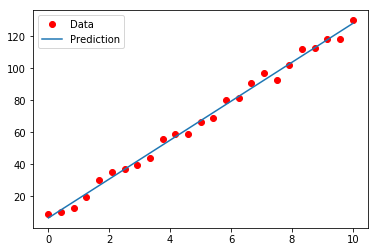

In [4]:
# Create session:
with tf.Session() as sess:
    # Initialize global variables:
    sess.run( tf.global_variables_initializer() )

    # Iterate over each training epoch:
    for epoch in range( num_epochs ):
        # Iterate over each training pair:
        for ( x, y ) in zip( trainX, trainY ):
            # Run optimizer on training pair:
            sess.run( optimizer, feed_dict = { X: x, Y: y } )

        # Print stats:
        if ( epoch + 1 ) % 25 == 0:
            curr_cost = sess.run( cost, feed_dict = { X: trainX, Y: trainY } )
            curr_W    = sess.run( W )
            curr_b    = sess.run( b )
            print "Epoch:", '%04d' % ( epoch + 1 ), \
                  "cost=", "{:.4f}".format( curr_cost ), \
                  "W=", "{:.4f}".format( curr_W ), \
                  "b=", "{:.4f}".format( curr_b )
                
    # Plot training data:
    plt.plot( trainX, trainY, 'ro', label = 'Data' )
    # Plot predictions:
    plt.plot( trainX, trainX * sess.run( W ) + sess.run( b ), label = 'Prediction' )
    # Plot legend:
    plt.legend()
    # Show plot:
    plt.show()